# Pymaceuticals Inc.

## Analysis
   * The drugs' effectiveness is inversely proportional to the weight of the mice.
   * Capomulin and Ramicane are the most effective drugs in reducing the size of the tumor

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combinedata = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
combinedata.head()

# Display the data table for preview
combinedata.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [55]:
# Checking the number of mice.
Mouse_count = len(mouse_metadata["Mouse ID"].unique())
Mouse_count                  

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_duplicate = combinedata.loc[combinedata.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
mouse_duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_duplicate_df = combinedata.loc[combinedata['Mouse ID'] == "g989", :]
mouse_duplicate_df

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
107      g989          0           45.000000                 0     Propriva   
137      g989          0           45.000000                 0     Propriva   
329      g989          5           48.786801                 0     Propriva   
360      g989          5           47.570392                 0     Propriva   
620      g989         10           51.745156                 0     Propriva   
681      g989         10           49.880528                 0     Propriva   
815      g989         15           51.325852                 1     Propriva   
869      g989         15           53.442020                 0     Propriva   
950      g989         20           55.326122                 1     Propriva   
1111     g989         20           54.657650                 1     Propriva   
1195     g989         25           56.045564                 1     Propriva   
1380     g989         30           59.082294                 1     Propriva   
1592     g989         35           62.570880                 2     Propriva   

         Sex  Age_months  Weight (g)  
107   Female          21          26  
137   Female          21          26  
329   Female          21          26  
360   Female          21          26  
620   Female          21          26  
681   Female          21          26  
815   Female          21          26  
869   Female          21          26  
950   Female          21          26  
1111  Female          21          26  
1195  Female          21          26  
1380  Female          21          26  
1592  Female          21          26

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combinedataclean = combinedata[combinedata["Mouse ID"].isin(mouse_duplicate)==False]
combinedataclean.head()


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25

In [6]:
# Checking the number of mice in the clean DataFrame.
Mouse_clean_count = len(combinedataclean["Mouse ID"].unique())
Mouse_clean_count

248

# Summary Statistics


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

summary_mean = combinedataclean["Tumor Volume (mm3)"].groupby(combinedataclean["Drug Regimen"]).mean()

summary_median = combinedataclean["Tumor Volume (mm3)"].groupby(combinedataclean["Drug Regimen"]).median()

summary_variance = combinedataclean["Tumor Volume (mm3)"].groupby(combinedataclean["Drug Regimen"]).var()

summary_std = combinedataclean["Tumor Volume (mm3)"].groupby(combinedataclean["Drug Regimen"]).std()

summary_sem = combinedataclean["Tumor Volume (mm3)"].groupby(combinedataclean["Drug Regimen"]).sem()

summary_df = pd.DataFrame({"Mean Tumor Volume":summary_mean, 
                          "Median Tumor Volume":summary_median,
                          "Tumor Volume Variance":summary_variance,
                          "Tumor Volume Std. Dev":summary_std,
                          "Tumor Volume Std. Err.":summary_sem})
summary_df




Mean Tumor Volume  Median Tumor Volume  Tumor Volume Variance  \
Drug Regimen                                                                  
Capomulin             40.675741            41.557809              24.947764   
Ceftamin              52.591172            51.776157              39.290177   
Infubinol             52.884795            51.820584              43.128684   
Ketapril              55.235638            53.698743              68.553577   
Naftisol              54.331565            52.509285              66.173479   
Placebo               54.033581            52.288934              61.168083   
Propriva              52.320930            50.446266              43.852013   
Ramicane              40.216745            40.673236              23.486704   
Stelasyn              54.233149            52.431737              59.450562   
Zoniferol             53.236507            51.818479              48.533355   

              Tumor Volume Std. Dev  Tumor Volume Std. Err.  
Drug Regimen                                                 
Capomulin                  4.994774                0.329346  
Ceftamin                   6.268188                0.469821  
Infubinol                  6.567243                0.492236  
Ketapril                   8.279709                0.603860  
Naftisol                   8.134708                0.596466  
Placebo                    7.821003                0.581331  
Propriva                   6.622085                0.544332  
Ramicane                   4.846308                0.320955  
Stelasyn                   7.710419                0.573111  
Zoniferol                  6.966589                0.516398

In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation = combinedataclean.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean", "median", "var", "std", "sem"])
summary_aggregation


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

# Bar and Pie Charts


In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_count = combinedataclean["Drug Regimen"].value_counts()
mice_count


Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

Text(0, 0.5, '# of Observed Mouse Timepoints')

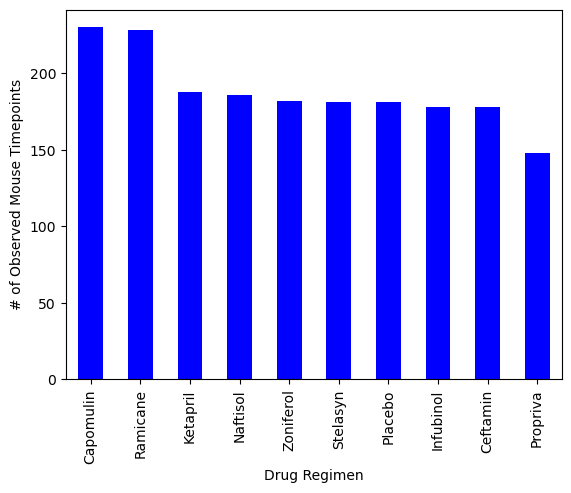

In [10]:
plot_pandas = mice_count.plot.bar(color='b')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")


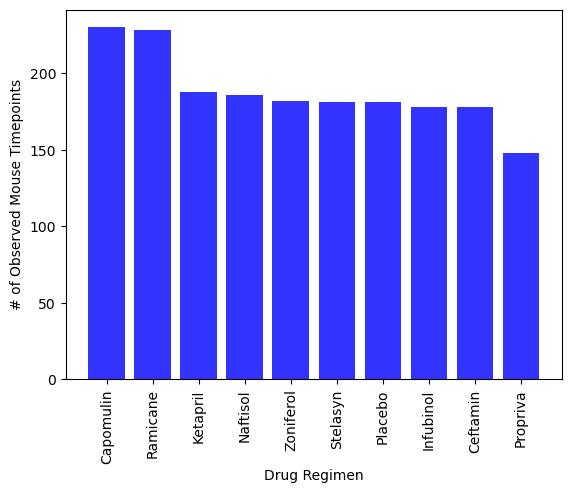

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = mice_count.index.values
y_axis = mice_count.values

plt.bar(x_axis, y_axis, color='b', alpha=0.8, align='center')

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")

plt.show()

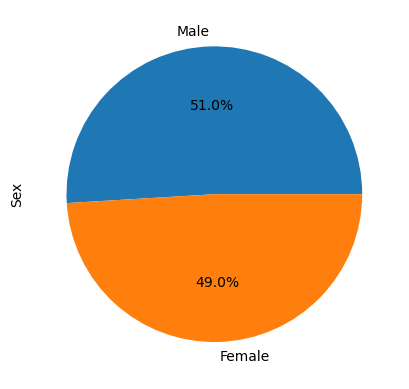

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_info = combinedataclean["Sex"].value_counts()
gender_info.plot.pie(autopct= "%1.1f%%")
plt.ylabel("Sex")
plt.show()


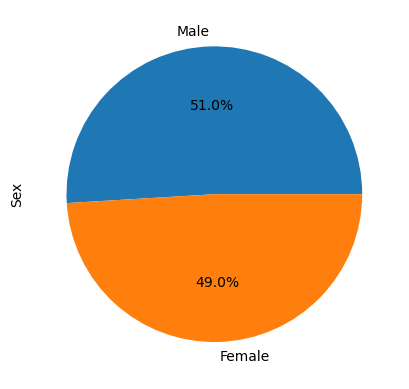

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = [49.7999197, 50.200803]
plot = gender_info.plot.pie(y="Total Count", autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

# Quartiles, Outlier, and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

Capomulin_df = combinedataclean.loc[combinedataclean["Drug Regimen"] == "Capomulin",:]
Ramicane_df =combinedataclean.loc[combinedataclean["Drug Regimen"] == "Ramicane", :]
Infubinol_df =combinedataclean.loc[combinedataclean["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = combinedataclean.loc[combinedataclean["Drug Regimen"] == "Ceftamin", :]


Capomulin_last = Capomulin_df.groupby("Mouse ID")["Timepoint"].max()
Capomulin_vol = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_vol, combinedataclean, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()




Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128         45           38.982878                 2    Capomulin   
1     b742         45           38.939633                 0    Capomulin   
2     f966         20           30.485985                 0    Capomulin   
3     g288         45           37.074024                 1    Capomulin   
4     g316         45           40.159220                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male           7          21  
2    Male          16          17  
3    Male           3          19  
4  Female          22          22

In [15]:
# Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

# quartiles =Capomulin_tumors.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq


# print(f"The lower quartile of Capomulin tumors: {lowerq}")
# print(f"The upper quartile of Capomulin tumors: {upperq}")
# print(f"The interquartile range of Capomulin tumors: {iqr}")
# print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [16]:
Ramicane_last = Ramicane_df.groupby("Mouse ID")["Timepoint"].max()
Ramicane_vol = pd.DataFrame(Ramicane_last)
Ramicane_merge = pd.merge(Ramicane_vol, combinedataclean, on=("Mouse ID","Timepoint"),how="left")
Ramicane_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a411         45           38.407618                 1     Ramicane   
1     a444         45           43.047543                 0     Ramicane   
2     a520         45           38.810366                 1     Ramicane   
3     a644         45           32.978522                 1     Ramicane   
4     c458         30           38.342008                 2     Ramicane   

      Sex  Age_months  Weight (g)  
0    Male           3          22  
1  Female          10          25  
2    Male          13          21  
3  Female           7          17  
4  Female          23          20

In [17]:
# Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

# quartiles =Ramicane_tumors.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq


# print(f"The lower quartile of Ramicane tumors: {lowerq}")
# print(f"The upper quartile of Ramicane tumors: {upperq}")
# print(f"The interquartile range of Ramicane tumors: {iqr}")
# print(f"The median of Ramicane tumors: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [18]:
Infubinol_last = Infubinol_df.groupby("Mouse ID")["Timepoint"].max()
Infubinol_vol = pd.DataFrame(Infubinol_last)
Infubinol_merge = pd.merge(Infubinol_vol, combinedataclean, on=("Mouse ID","Timepoint"),how="left")
Infubinol_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a203         45           67.973419                 2    Infubinol   
1     a251         45           65.525743                 1    Infubinol   
2     a577         30           57.031862                 2    Infubinol   
3     a685         45           66.083066                 3    Infubinol   
4     c139         45           72.226731                 2    Infubinol   

      Sex  Age_months  Weight (g)  
0  Female          20          23  
1  Female          21          25  
2  Female           6          25  
3    Male           8          30  
4    Male          11          28

In [19]:
# Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

# quartiles =Infubinol_tumors.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq


# print(f"The lower quartile of Infubinol tumors: {lowerq}")
# print(f"The upper quartile of Infubinol tumors: {upperq}")
# print(f"The interquartile range of Infubinol tumors: {iqr}")
# print(f"The median of Infubinol tumors: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [20]:
Ceftamin_last = Ceftamin_df.groupby("Mouse ID")["Timepoint"].max()
Ceftamin_vol = pd.DataFrame(Ceftamin_last)
Ceftamin_merge = pd.merge(Ceftamin_vol, combinedataclean, on=("Mouse ID","Timepoint"),how="left")
Ceftamin_merge.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     a275         45           62.999356                 3     Ceftamin   
1     b447          0           45.000000                 0     Ceftamin   
2     b487         25           56.057749                 1     Ceftamin   
3     b759         30           55.742829                 1     Ceftamin   
4     f436         15           48.722078                 2     Ceftamin   

      Sex  Age_months  Weight (g)  
0  Female          20          28  
1    Male           2          30  
2  Female           6          28  
3  Female          12          25  
4  Female           3          25

In [21]:
# Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

# quartiles =Ceftamin_tumors.quantile([.25,.5,.75])
# lowerq = quartiles[0.25]
# upperq = quartiles[0.75]
# iqr = upperq-lowerq


# print(f"The lower quartile of Ceftamin tumors: {lowerq}")
# print(f"The upper quartile of Ceftamin tumors: {upperq}")
# print(f"The interquartile range of Ceftamin tumors: {iqr}")
# print(f"The median of Ceftamin tumors: {quartiles[0.5]} ")

# lower_bound = lowerq - (1.5*iqr)
# upper_bound = upperq + (1.5*iqr)

# print(f"Values below {lower_bound} could be outliers.")
# print(f"Values above {upper_bound} could be outliers.")

In [70]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
    
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# drug_names = []
drugs = combinedataclean[combinedataclean["Drug Regimen"].isin(drug_list)]
drugs.head()

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0      b128          0                45.0                 0    Capomulin   
29     c326          0                45.0                 0    Infubinol   
30     c139          0                45.0                 0    Infubinol   
31     v339          0                45.0                 0    Infubinol   
32     a577          0                45.0                 0    Infubinol   

       Sex  Age_months  Weight (g)  
0   Female           9          22  
29  Female          18          25  
30    Male          11          28  
31    Male          20          26  
32  Female           6          25

In [71]:
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for drug in drug_list:
    print(drug)

Capomulin
Ramicane
Infubinol
Ceftamin


In [24]:
last_timepoint

Drug Regimen         Capomulin   Ceftamin  Infubinol   Ramicane
Mouse ID                                                       
a203     tumor_size        NaN        NaN  67.973419        NaN
a251     tumor_size        NaN        NaN  65.525743        NaN
a275     tumor_size        NaN  62.999356        NaN        NaN
a411     tumor_size        NaN        NaN        NaN  38.407618
a444     tumor_size        NaN        NaN        NaN  43.047543
...                        ...        ...        ...        ...
y769     tumor_size        NaN  68.594745        NaN        NaN
y793     tumor_size  31.896238        NaN        NaN        NaN
y865     tumor_size        NaN  64.729837        NaN        NaN
z578     tumor_size        NaN        NaN        NaN  30.638696
z581     tumor_size        NaN        NaN  62.754451        NaN

[100 rows x 4 columns]

In [72]:
treatment = 0
for drug in drug_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = round(upperq-lowerq,2)
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)
    
    if treatment == 0:
        print(f"------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is: {lowerq}")
    print(f"The upper quartile of {drug} treatments is: {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"------------------------------------------------------------")
    treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

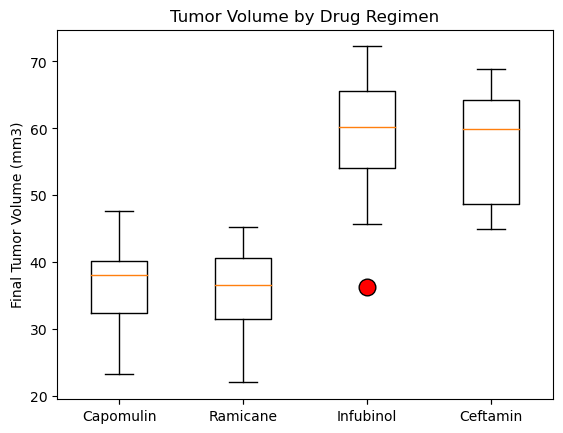

In [95]:
  
boxplot_list = []
for drug in drug_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
    # Put treatments into a list for for loop (and later for plot labels)
    treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
    
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig = plt.figure()
 
plt.xticks([1, 2, 3, 4], drug_list, rotation=0)
plt.ylabel("Final Tumor Volume (mm3)")
plt.title("Tumor Volume by Drug Regimen")

orange_out = dict(markerfacecolor='red',markersize=12) 
plt.boxplot(boxplot_list, labels = treatment_list, flierprops=orange_out)

plt.show()

# Line and Scatter Plots

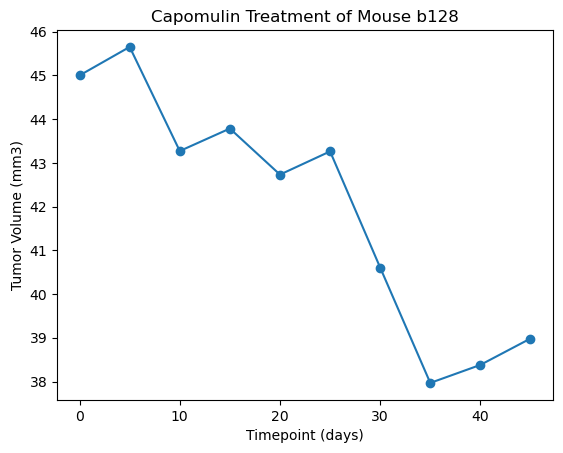

In [27]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
MouseCap = combinedataclean.loc[combinedataclean['Mouse ID'] == 'b128']

plt.plot(MouseCap['Timepoint'], MouseCap['Tumor Volume (mm3)'], marker = 'o')
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse b128")
plt.show()

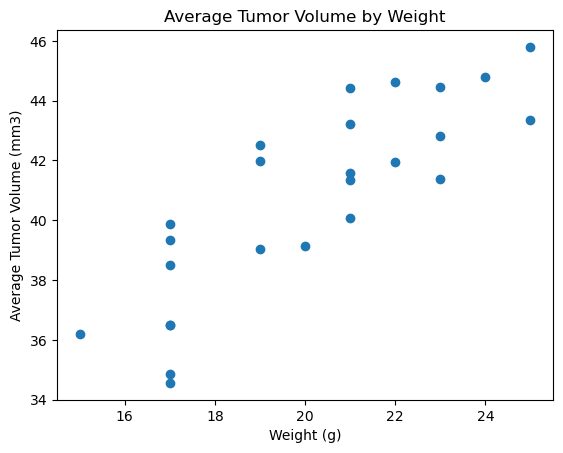

In [51]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = combinedataclean.loc[combinedataclean['Drug Regimen'] == 'Capomulin']

avg_volume = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index()
avg_volume = avg_volume.rename(columns={'Tumor Volume (mm3)':'avg_tumor_vol'})
avg_volume = pd.merge(capomulin_df, avg_volume, on='Mouse ID')

final_avg_volume = avg_volume[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_volume
x = final_avg_volume['Weight (g)']
y = final_avg_volume['avg_tumor_vol']
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()


# Correlation and Regression

The correlation between weight and average tumor volume on the Capomulin regimen is 0.84.


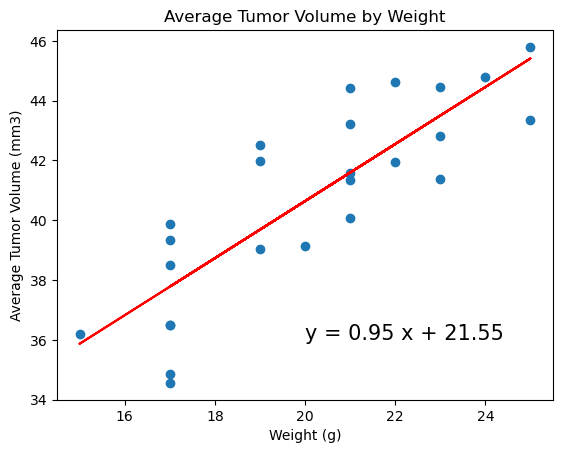

In [57]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen



(slope, intercept,rvalue, pvalue, stderr) = linregress(final_avg_volume["Weight (g)"], final_avg_volume["avg_tumor_vol"])

regress_values = final_avg_volume["Weight (g)"] * slope + intercept

line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"

plt.scatter(final_avg_volume["Weight (g)"], final_avg_volume["avg_tumor_vol"])
plt.plot(final_avg_volume["Weight (g)"], regress_values,"r-")

plt.annotate(line_eq,(20,36), fontsize=15, color="black")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

# correlation = pearsonr(final_avg_volume["Weight (g)"], final_avg_volume["avg_tumor_vol"])

print(f"The correlation between weight and average tumor volume on the Capomulin regimen is {round(correlation[0], 2)}.")

plt.show()